In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sktime.forecasting.arch import ARCH
from sktime.utils.plotting import plot_series
from sktime.forecasting.arima import ARIMA, AutoARIMA
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
# временной горизонт для прогнозирования
from sktime.forecasting.base import ForecastingHorizon

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df = pd.read_excel('C:\\Users\\ф\\Desktop\\konvid.xlsx')
df

,year,market,pc,phone,console,usd
0,2016,91,NaN,NaN,NaN,67.0014
1,2017,94,NaN,NaN,NaN,58.3446
2,2018,101,NaN,NaN,NaN,62.7414
3,2019,121,61.0,37.0,24.0,64.7155
4,2020,163,82.0,67.0,14.0,72.1791
5,2021,178,85.0,77.0,16.0,73.6552
6,2022,168,81.0,72.0,14.0,68.5386
7,2023,176,85.0,76.0,15.0,85.2997
8,2024,187,90.0,81.0,15.0,92.6225


# year - год
# market - общий объём рынка видеоигр в России
# pc - объём рынка ПК в России
# phone - объём мобильного рынка в России
# console - объём консольного рынка в России
# usd - среднегодовой курс доллара согласно ЦБ РФ

<Axes: xlabel='usd', ylabel='market'>

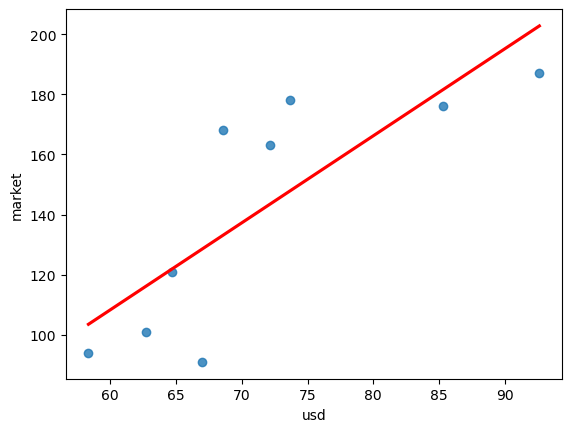

In [3]:
sns.regplot(data=df, x='usd', y='market', ci=None, line_kws={"color": "r"})

In [4]:
fitted_line = smf.ols(formula='market~usd', data=df).fit()
fitted_line.params.round(2)

Intercept   -65.37
usd           2.89
dtype: float64

При увеличении курса доллара на 1 рубль, объём рынка видеоигр в России увеличивается примерно на 2,89 млрд руб.

In [5]:
fitted_line = smf.ols(formula='pc~usd', data=df).fit()
fitted_line.params.round(2)

Intercept    26.86
usd           0.71
dtype: float64

При увеличении курса доллара на 1 рубль, объём ПК-гейминга в России увеличивается примерно на 0,71 млрд руб.

In [6]:
fitted_line = smf.ols(formula='phone~usd', data=df).fit()
fitted_line.params.round(2)

Intercept   -11.49
usd           1.05
dtype: float64

При увеличении курса доллара на 1 рубль, объём рынка мобильного гейминга в России увеличивается примерно на 1,05 млрд руб.

In [7]:
fitted_line = smf.ols(formula='console~usd', data=df).fit()
fitted_line.params.round(2)

Intercept    28.99
usd          -0.17
dtype: float64

При увеличении курса доллара на 1 рубль, объём консольного гейминга в России уменьшается примерно на 0,17 млрд руб.

In [8]:
X = sm.add_constant(df['year'])  # добавим свободный член
y = df['market']
model_year = sm.OLS(y, X).fit()

In [9]:
future_years = pd.DataFrame({'year': list(range(2025, 2031))})
X_future = sm.add_constant(future_years)

In [10]:
future_years['forecast_year'] = model_year.predict(X_future)

In [11]:
print(future_years.round(0))

   year  forecast_year
0  2025          211.0
1  2026          224.0
2  2027          238.0
3  2028          252.0
4  2029          265.0
5  2030          279.0


In [12]:
Z = sm.add_constant(df['usd'])

In [13]:
model_usd = sm.OLS(y, Z).fit()

In [14]:
future_course = pd.DataFrame({'usd': [70, 80, 90, 100, 110, 130, 150]})
Z_future = sm.add_constant(future_course)

In [15]:
future_course['forecast_usd'] = model_usd.predict(Z_future)

In [16]:
print(future_course.round(0))

   usd  forecast_usd
0   70         137.0
1   80         166.0
2   90         195.0
3  100         224.0
4  110         253.0
5  130         311.0
6  150         369.0


In [17]:
forecaster = AutoARIMA(information_criterion='bic', test='kpss', seasonal=False)
forecaster.fit(y)
forecaster.get_fitted_params()

{'intercept': 25.811277236393728,
 'ar.L1': 1.4305493835089695,
 'ar.L2': -0.6099647443351557,
 'sigma2': 201.79195597226365,
 'order': (2, 0, 0),
 'seasonal_order': (0, 0, 0, 0),
 'aic': 83.79500895604394,
 'aicc': 93.79500895604394,
 'bic': 84.58390726538882,
 'hqic': 82.0925690214571}

In [18]:
forecaster = ARIMA(order=(2,0,0), trend='n')
forecaster.fit(y)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    9
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -39.758
Date:                Sun, 04 May 2025   AIC                             85.515
Time:                        22:30:57   BIC                             86.107
Sample:                             0   HQIC                            84.239
                                  - 9                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4952      0.667      2.242      0.025       0.188       2.802
ar.L2         -0.5057      0.681     -0.743      0.457      -1.839       0.828
sigma2       234.2500    234.865      0.997      0.319    -226.076     694.576
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.90   Prob(JB):                         1.00
Heteroskedasticity (H):               3.96   Skew:                             0.06
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
fh = ForecastingHorizon(np.arange(1,7), freq ='Y')
y_pred = forecaster.fit_predict(y=y, fh=fh)
y_pred.round(0)

9     191.0
10    190.0
11    188.0
12    185.0
13    182.0
14    178.0
Name: market, dtype: float64

In [20]:
forecaster = ARCH(mean='AR', lags=1, vol='GARCH', p=1, q=1, power=2)  
forecaster.fit(y)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                 market   R-squared:                       0.849
Mean Model:                        AR   Adj. R-squared:                  0.824
Vol Model:                      GARCH   Log-Likelihood:               -32.1721
Distribution:                  Normal   AIC:                           74.3442
Method:            Maximum Likelihood   BIC:                           74.7414
                                        No. Observations:                    8
Date:                Sun, May 04 2025   Df Residuals:                        6
Time:                        22:30:58   Df Model:                            2
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const         26.8460     18.839      1.425      0.154 [-10.077, 63.769]
market[1]      0.8914      0.127      7.039  1.930e-12 [  0.643,  1.140]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         91.0968    360.105      0.253      0.800 [-6.147e+02,7.969e+02]
alpha[1]       0.0000  8.622e-02      0.000      1.000      [ -0.169,  0.169]
beta[1]        0.5000      2.039      0.245      0.806      [ -3.496,  4.496]
=============================================================================

Covariance estimator: robust
"""

In [21]:
fh = ForecastingHorizon(np.arange(1,7), freq ='Y')
y_pred = forecaster.fit_predict(y=y, fh=fh)
y_pred.round(0)

9     194.0
10    199.0
11    205.0
12    209.0
13    213.0
14    217.0
Name: market, dtype: float64